<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>Comp 555 BioAlgorithms - Spring 2019</h1>
<h1 style="font-size: 250%;">Problem Set #1 </h1>
<h1 style="font-size: 150%;">Version 2.0</h1>
<h1>Issued Tuesday, 1/22/2019; Due Tuesday, 2/5/2019</h1>
</div>

**Homework Information:** Some of the problems are probably too long to be done the night before the due date, so plan accordingly. Late problem sets will be penalized by a factor of	70.71% for each class meeting after the due date. Feel free to get help from others, but **the work you submit in should be your own.** It is very important that you enter your answers in the provided cells. You can add extra cells to explore approaches, but only the provided cell can and will be graded.

**Warning:** This notebook has been annotated with metadata so that it can be uploaded to the grading system. Thus, if you delete a cell and add a replacement, there is a possiblity that your problem will not be graded. If you ever need to start over, you should download a new version of the problem set and transfer your solutions to it.

This problem set will examine two genomes <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/GenomeA.fa" download="GenomeA">GenomeA.fa</a> and <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/GenomeB.fa" download="GenomeB">GenomeB.fa</a>. One is the genome of an actual organism, the other is a random seqence of nucleotides. Some answers are provided in order to test your code for the genome of <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/ThermotogaPetrophila.fa" download="ThermotogaPetrophila.fa">ThermotogaPetrophila.fa</a> from Lecture 3.

The cell below provides various functions and imports necessary for this problem set. Do not import any addtional packages. Also, make sure that you ***run the following cell***.

In [2]:
import gzip
import itertools
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into two lists. One of 
        headers and a second list of sequences.
        The ith index of each list correspond."""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

---
**Problem #1:**

Write a function to find the length of the shortest ***missing*** <em>k</em>-mer in a given genome. 
Your function should return a value for <em>k</em>, the number of <em>k</em>-mers missing (must be 1 or greater). 
A template for the function is provided in the cell below. 
This cell should include ***only your function*** definition.
A cell for testing is provided after.

In [3]:
# This cell is graded
def kmerCount(seq, k):
    loopSeq = seq + seq[1:k]
    kmerDict = {}
    for i in range(1,len(seq)):
        kmer = loopSeq[i:i+k]
        kmerDict[kmer] = kmerDict.get(kmer,0) + 1
    return kmerDict

def shortestMissingKmer(seq):
    """ Returns the value of k for the shortest missing 
         k-mer, and a list of all such k-mers"""
    k, missing  = 0, 0
    for k in range(2,12):
        kDict = kmerCount(seq,k)
        missing = 4**k - len(kDict)
        if missing > 0:
            return k,missing
    #   ~~ Your code goes here~~
    return k, missing

The following cell below is provided for testing your code. You should test it on both GenomeA and GenomeB. This cell will not be considered during grading.

In [12]:
header, sequence = loadFasta("data/GenomeA.fa")
print("data/GenomeA.fa", shortestMissingKmer(sequence[0]))
header, sequence = loadFasta("data/GenomeB.fa")
print("data/GenomeB.fa", shortestMissingKmer(sequence[0]))


data/GenomeA.fa (9, 225)
data/GenomeB.fa (8, 442)


In [13]:
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
shortestMissingKmer(sequence[0])
# The correct answer is: (7, 4)

(7, 4)

---
**Problem #2:**

Write a function that returns a list of the number of k-mers that appear N times for a given value of k (i.e. how many k-mers appear 0 times, 1 time, 2 times, 3 times ...) where the <em>i</em>-th element in the list is the number of kmers appearing <em>i</em> times. The length of your list need only be as long as the most frequent k-mer. Take the result from your function and plot a histogram of the k-mer frequencies for GenomeA and GenomeB.

A template for the function is provided in the cell below. Once more, only include your function definition in the cell below.

In [5]:
# This cell is graded
def kmerFrequency(seq, k):
    kdict = kmerCount(seq, k)
    NList = [0]*(max(kdict.values())+1)
    NList[0] = 4**k - len(kdict)
    for kmer in kdict:
        n = kdict[kmer]
        NList[n] += 1
        # ~Your code goes here~
    return NList

Use the following cell to test your function. Run it on GenomeA and GenomeB, and plot separate k-mer frequencies for each on a semilog scale.

data/ThermotogaPetrophila.fa (7, 4)
1083
386
149
66
48
43
42
42
data/GenomeA.fa (9, 225)
157
58
23
11
7
7
5
4
data/GenomeB.fa (8, 442)
1100
391
157
65
30
17
11
10


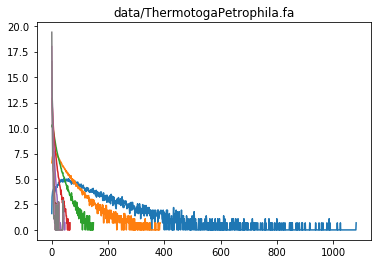

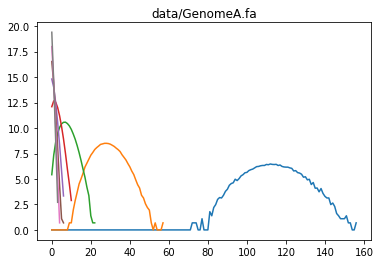

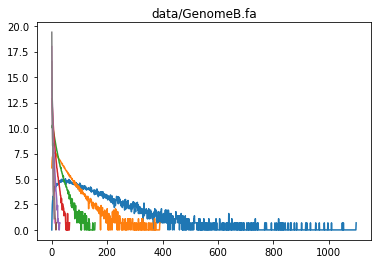

In [6]:
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
print("data/ThermotogaPetrophila.fa", shortestMissingKmer(sequence[0]))
plt.title("data/ThermotogaPetrophila.fa")
for k in range(7,15):
    hist = kmerFrequency(sequence[0], k)
    print(len(hist))
    plt.plot(range(len(hist)), [math.log(v+1) for v in hist])

header, sequence = loadFasta("data/GenomeA.fa")
print("data/GenomeA.fa", shortestMissingKmer(sequence[0]))
plt.figure()
plt.title("data/GenomeA.fa")
for k in range(7,15):
    hist = kmerFrequency(sequence[0], k)
    print(len(hist))
    plt.plot(range(len(hist)), [math.log(v+1) for v in hist])

header, sequence = loadFasta("data/GenomeB.fa")
print("data/GenomeB.fa", shortestMissingKmer(sequence[0]))
plt.figure()
plt.title("data/GenomeB.fa")
for k in range(7,15):
    hist = kmerFrequency(sequence[0], k)
    print(len(hist))
    plt.plot(range(len(hist)), [math.log(v+1) for v in hist])

A correct implementation of kmerFrequency() when called by the following code:
```python
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")

for k in xrange(7,15):
    hist = kmerFrequency(sequence[0], k)
    print len(hist)
    plt.plot(range(len(hist)), [math.log(v+1) for v in hist])
```

should generate the following outputs:

1083<br>
386<br>
149<br>
66<br>
48<br>
43<br>
42<br>
42<br>

<img src="http://csbio.unc.edu/mcmillan/Comp555S19/Media/PS01Fig1.png" />


---
**Problem #3:**

Use your kmerFrequency() function from Problem #2 to find the smallest value of k where the number of non-repeated k-mers is more than 90% of the k-mers in the genome.

In [7]:
# This cell is graded
def nonrepeatingKmers(seq):
    unique90 = k = percent = 0
    loopSeq = seq + seq[1:k]
    while (percent <= .9):
        unique90+=1
        kmerFreq = kmerFrequency(loopSeq, unique90)
        percent = kmerFreq[1]/sum(kmerFreq[1:]) #freq[1] means nonrepeated

        # ~Your code goes here~
    return unique90

Use the following Cell to test your function.

In [8]:
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
print("data/ThermotogaPetrophila.fa", nonrepeatingKmers(sequence[0]))
header, sequence = loadFasta("data/GenomeA.fa")
print("data/GenomeA.fa", nonrepeatingKmers(sequence[0]))
header, sequence = loadFasta("data/GenomeB.fa")
print("data/GenomeB.fa", nonrepeatingKmers(sequence[0]))

data/ThermotogaPetrophila.fa 13
data/GenomeA.fa 12
data/GenomeB.fa 13


---
**Problem #4:**

Plot the C-G skew plot as shown in class for both GenomeA and GenomeB. Plot the result and use the returned array of counts to estimate a 1000-bp interval that you would predict to contain the __OriR__ locus. In the cell below enter your code to plot the C-G skew plots and your prediction of the __OriR__ interval for both GenomeA and GenomeB.

Initial Max Y Value: 1774 	Initial Index of Y: 1270001
Finer Max Y Value: 1788 	Finer Index of Y: 1270091
*** Genome A OriR estimation between base numbers 1269501 and 1270501 ***

Initial Max Y Value: 61557 	Initial Index of Y: 2501
Finer Max Y Value: 61587 	Finer Index of Y: 2822
*** Genome B OriR estimation between base numbers 2001 and 3001 ***



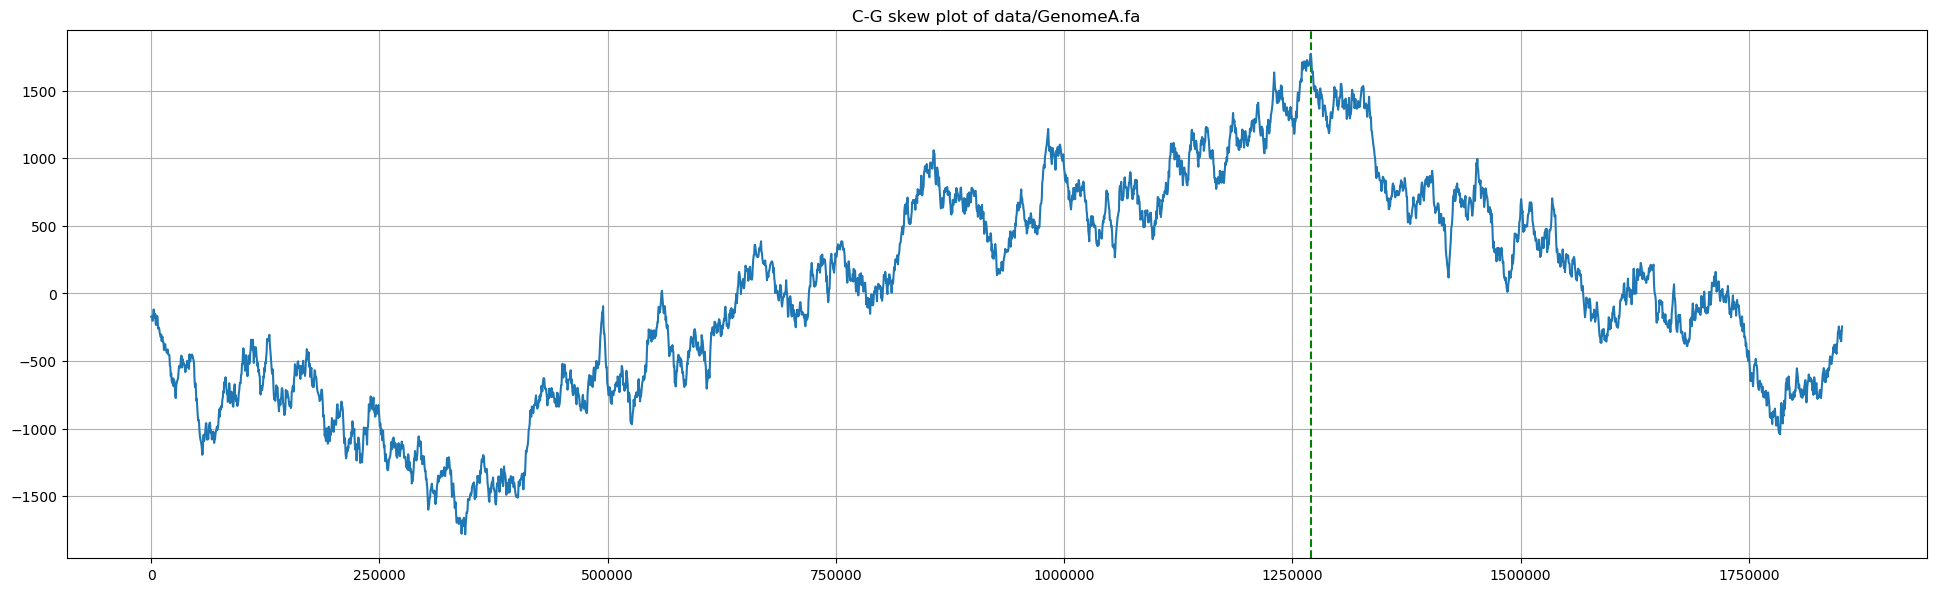

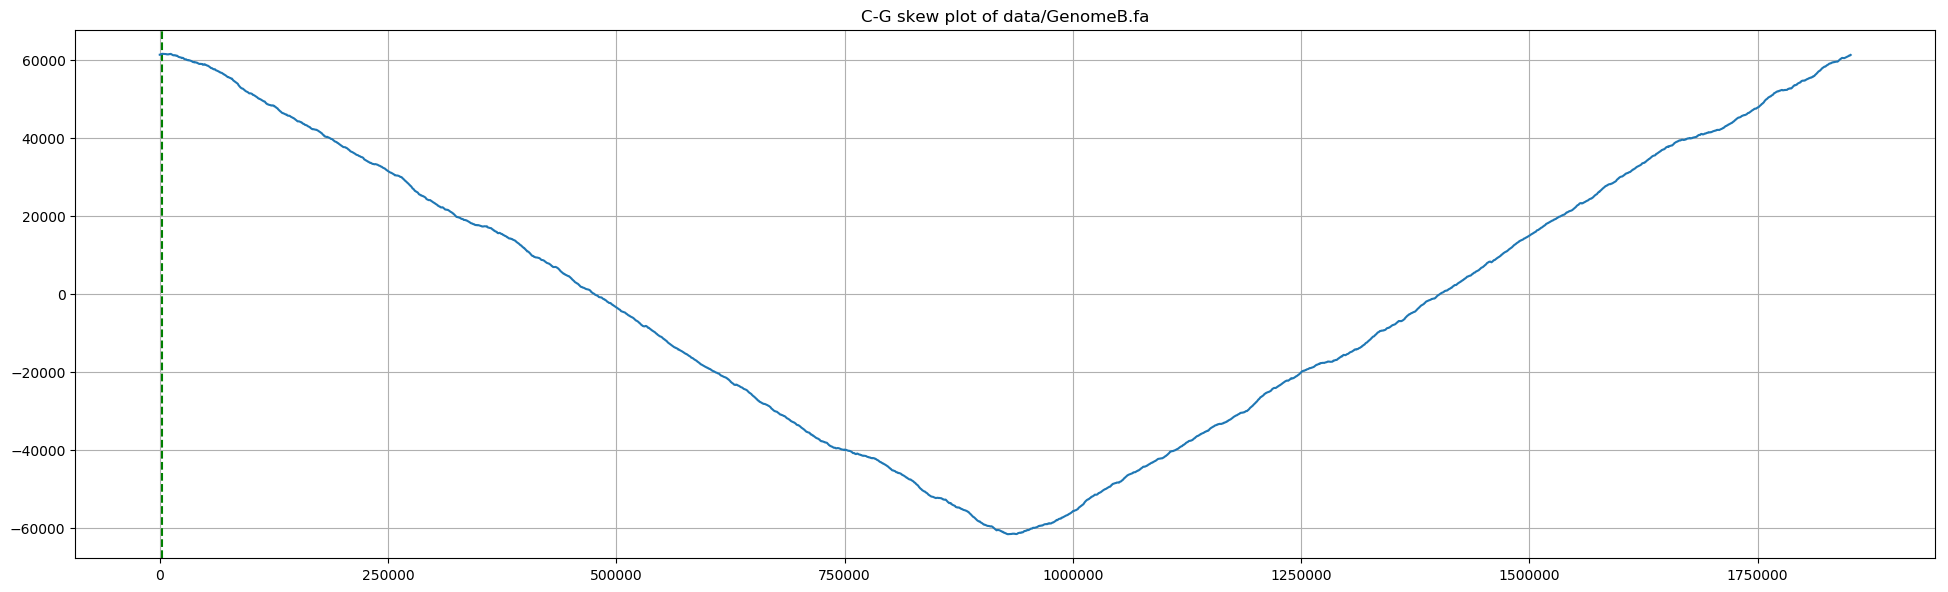

In [17]:
# This cell is graded
def getGCdiff(sequence, start):
    halflen = len(sequence)//2
    terC = start + halflen
    # handle genome's circular nature
    if (terC > len(sequence)):
        terC = terC - len(sequence) + 1
    if (terC > start):                                   # case 1: ----S========T---->
        G = 2*sequence[start:terC].count('G') - sequence.count('G')
        C = 2*sequence[start:terC].count('C') - sequence.count('C')
    else:                                                # case 2: ====T--------S====>
        G = sequence.count('G') - 2*sequence[terC:start].count('G')
        C = sequence.count('C') - 2*sequence[terC:start].count('C')
    return G - C

def GCSkew(genome):
    x = []
    y = []
    for i in range(1,len(genome),500):
        x.append(i)
        y.append(getGCdiff(genome,i))
        
    valueOfMax = max(y)
    indexOfMax = x[y.index(valueOfMax)]
    print("Initial Max Y Value:", valueOfMax, "\tInitial Index of Y:", indexOfMax)
    newIndexOfMax = indexOfMax
    newValueOfMax = valueOfMax
    for offset in range(-500,500):
        temp = getGCdiff(genome,indexOfMax+offset) #handles the circular nature
        if temp > newValueOfMax:
            newIndexOfMax = indexOfMax+offset
            newValueOfMax = temp
    print("Finer Max Y Value:", newValueOfMax, "\tFiner Index of Y:", newIndexOfMax)
    #I decided to return a bunch of values here so I don't need to recalculate them later...
    return x, y, indexOfMax, valueOfMax, newIndexOfMax, newValueOfMax

header, genA = loadFasta("data/GenomeA.fa")
x, y, indexOfMax, valueOfMax, newIndexOfMax, newValueOfMax = GCSkew(genA[0])

plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(indexOfMax, color="g", linestyle='--')
print("*** Genome A OriR estimation between base numbers", indexOfMax - 500, "and", indexOfMax + 500,"***\n")
plt.grid()
plt.title("C-G skew plot of data/GenomeA.fa")
result = plt.plot(x, y)


header, genB = loadFasta("data/GenomeB.fa")
x, y, indexOfMax, valueOfMax, newIndexOfMax, newValueOfMax = GCSkew(genB[0])

plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(indexOfMax, color="g", linestyle='--')
print("*** Genome B OriR estimation between base numbers", indexOfMax - 500, "and",indexOfMax + 500,"***\n")
plt.grid()
plt.title("C-G skew plot of data/GenomeB.fa")
result = plt.plot(x, y)



Many examples related to C-G skew can be found in the Lecture 3 notebook.

---
**Problem #5:**

Consider the tools that you have developed in problems 1-4 to predict which of GenomeA and GenomeB is real. In the cell provided below explain your reasoning as it relates to each tool.

---

## Instructions for submitting your problem set

When you are ready to submit a version of your problem set, follow the instructions below.

1. Press [Save and Checkpoint] on the *File* menu of your Jupyter notebook.
2. Press the link below, which will take you to a website for submitting your problem set.
3. Choose the ***correct problem set number*** from the pull-down, else you might overwrite an earlier submission.
4. Enter in your onyen and PID in the form provided, then upload your submission.

Click [here to submit](http://csbio.unc.edu/mcmillan/index.py?run=PS.upload) your completed problem set

**Instructions for resubmissions:**

1. You may resubmit as many times as you like before the deadline. 
2. Resubmissions *always* overwrite any earlier submissions. 
3. If you resubmit after the due date, you will be warned of any penalties. 
4. Problem sets will not be regraded.